# PageRank (Project C)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Task 1 (Create G matrix for multiple alphas, plot the result)

## Βοηθητικές Συναρτήσεις (Μετατροπή M σε Google Πίνακα, Γραφική παράσταση ιδιοτιμών)

In [34]:
def m_to_g(M, alpha):
    """
    Convert a matrix M to a Google matrix G.
    """
    n = M.shape[0]
    A = np.zeros((n, n))
    for i in range(n):
        if M[i].sum() == 0:
            A[i] = np.ones(n) / n
        else:
            A[i] = M[i] / M[i].sum()
    G = alpha * A + (1 - alpha) / n * np.ones((n, n))
    return G

def plot_eigenvalues(eigenvalues):
    """
    Plot the eigenvalues of all 3 Google matrices and draw circles with radius alpha.
    """
    alphas = [0.85, 0.5, 0.25]
    colors = ['blue', 'orange', 'green'] 

    plt.figure(figsize=(10, 10))
    ax = plt.gca()

    for i, eig in enumerate(eigenvalues):
        plt.scatter(np.real(eig), np.imag(eig), label=f'α = {alphas[i]}', s=10, color=colors[i])
        
        circle = plt.Circle((0, 0), radius=alphas[i], color=colors[i], fill=False, linestyle='--')
        ax.add_patch(circle)

    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    
    plt.axis('equal') 
    
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title('Eigenvalues of Google Matrices with Alpha Circles')
    plt.legend()
    plt.grid()
    plt.show()

Ο πίνακας (1/n)ee^T μπορεί να κατασκευάσει πίνακα G μόνο άμα είναι ο ίδιος στοχαστικός. Εφόσον είναι στοχαστικός, μπορεί να χρησιμοποιεί οποιαδήποτε κατανομή θεωρείται αποτελεσματική.

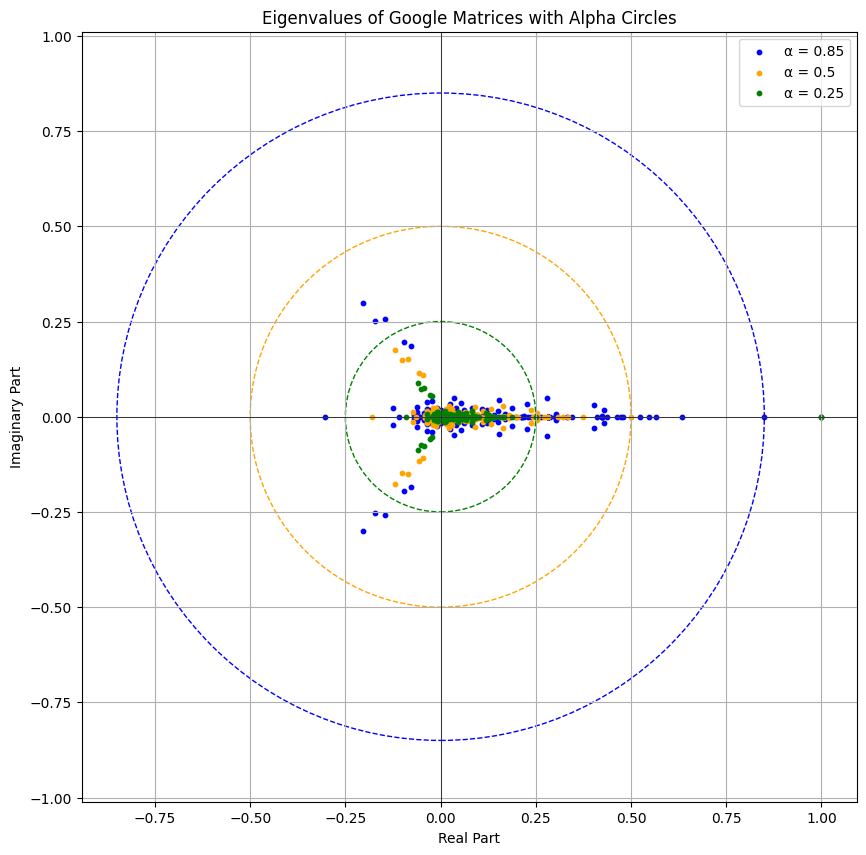

In [36]:
M = np.asarray(pd.read_csv('google.csv', header=None))
alphas = [0.85, 0.5, 0.25]

G = []

for i in range (3):
    G.append(m_to_g(M, alphas[i]))


eig_G = []
eigv_G = []

for g in G:
    g_t = g.T
    eig, eigv = np.linalg.eig(g_t)
    eig_G.append(eig)
    eigv_G.append(eigv)

plot_eigenvalues(eig_G)

## Task 2 (Find eigenvector of eigenvalue = 1 for each α, print the top 10 pages.)

In [37]:
def find_eigenvector_one(eigenvalues, X):
    """
    Find the eigenvector corresponding to the eigenvalue 1 for all 3 Google matrices.
    """
    eigenvector_one = []
    for i, eig in enumerate(eigenvalues):
        for j, e in enumerate(eig):
            if np.isclose(e, 1):
                eigenvector_one.append(X[i][:, j])
                break
    
    return eigenvector_one

def normalize_eigenvector(eigenvector):
    """
    Normalize the eigenvector so that its sum is 1.
    """
    norm = np.sum(eigenvector)
    if norm == 0:
        return eigenvector
    return eigenvector / norm

Το θεώρημα που μας επιτρέπει να υποθέσουμε ότι το ιδιοδιάνυσμα της μεγαλύτερης ιδιοτιμής έχει θετικές και πραγματικές τιμές είναι το **Θεώρημα Perron-Frobenius**. Λέει πως εφόσον ένας πίνακας είναι τετραγωνικός με θετικές τιμές (στη συγκεκριμένη περίπτωση και στοχαστικός ανά γραμμή), έχει τη μέγιστη ιδιοτιμή πραγματική, θετική και με μεγαλύτερο μέτρο από τις υπόλοιπες ιδιοτιμές της. Επίσης το ιδιοδιάνυσμα της θα είναι και αυτό θετικό και πραγματικό.

In [42]:
x = find_eigenvector_one(eig_G, eigv_G)

x = [normalize_eigenvector(eigenvector) for eigenvector in x]

page_rank = [{'alpha': alphas[i], 'ranks': [{'arg': 0, 'prob': 0}]} for i in range(3)]

for i in range(3):
    print(f"Top pages for α = {alphas[i]}:")

    sorted_indices = np.argsort(-x[i])  # Sort indices in descending order

    for j in range(10):
        print(f"Page ranked {j+1}: (No. {sorted_indices[j] + 1}) has PageRank {x[i][sorted_indices[j]]}")
        page_rank[i]['ranks'].append({'arg': sorted_indices[j], 'prob': x[i][sorted_indices[j]]})
    print("\n")


Top pages for α = 0.85:
Page ranked 1: (No. 6) has PageRank (0.05074386818501112+0j)
Page ranked 2: (No. 2) has PageRank (0.028434335450914276+0j)
Page ranked 3: (No. 27) has PageRank (0.028152357898676757+0j)
Page ranked 4: (No. 20) has PageRank (0.027030484039230057+0j)
Page ranked 5: (No. 19) has PageRank (0.020702354641067833+0j)
Page ranked 6: (No. 167) has PageRank (0.014367392283152359+0j)
Page ranked 7: (No. 189) has PageRank (0.014264661970466878+0j)
Page ranked 8: (No. 145) has PageRank (0.01361711455334642+0j)
Page ranked 9: (No. 15) has PageRank (0.013005396134865552+0j)
Page ranked 10: (No. 203) has PageRank (0.012405812079070029+0j)


Top pages for α = 0.5:
Page ranked 1: (No. 6) has PageRank (0.02565413327455345+0j)
Page ranked 2: (No. 20) has PageRank (0.02168163527392364+0j)
Page ranked 3: (No. 19) has PageRank (0.015956511701810772+0j)
Page ranked 4: (No. 27) has PageRank (0.015872590489800033+0j)
Page ranked 5: (No. 2) has PageRank (0.014750573039501605+0j)
Page rank

Τα αποτελέσματα έχουν μικρές διαφορές μεταξύ τους γιατί το α είναι ένας παράγοντας δημοκρατικοποίησης της κατανομής, που όχι μόνο επηρεάζει την αξία του random jump, αλλά και του πίνακα μετάβασης.

# Task 3 (Powers Method to find the max eigenvector, then print top ranks)

In [40]:
def m_to_a(M):
    n = M.shape[0]
    A = np.zeros((n, n))
    for i in range(n):
        if M[i].sum() == 0:
            A[i] = np.ones(n) / n
        else:
            A[i] = M[i] / M[i].sum()
    return A

def power_method(A_T, alpha, n, tol=1e-6, max_iter=500):

    # We are looking for the principal eigenvector of the Google matrix G^T

    v = np.ones(n) / n # Norm 1 normalized vector
    iterations = 0
    
    rand_jump = (1 - alpha) / n 

    for i in range(max_iter):
        v_old = v
        
        v = alpha * (A_T @ v_old) + rand_jump # (1 - alpha)/n is originally multiplied by E @ v, which will always be a vector of ones. Same as doing element-wise addition.

        # The sum of v is already 1 (probability distribution), so no normalization is needed.
        
        iterations += 1
        if np.linalg.norm(v - v_old, 1) < tol:
            break
            
    return v, iterations

In [45]:
A_T = m_to_a(M).T

for i in range(3):
    print(f"Calculating PageRank for α = {alphas[i]}...")

    n = A_T.shape[0]
    v, iterations = power_method(A_T, alphas[i], n)

    print(f"Converged in {iterations} iterations.\n")
    
    x[i] = v

page_rank_new = [{'alpha': alphas[i], 'ranks': [{'arg': 0, 'prob': 0}]} for i in range(3)]

for i in range(3):
    print(f"Top pages for α = {alphas[i]}:")

    sorted_indices = np.argsort(-x[i])  # Sort indices in descending order

    for j in range(10):
        print(f"Page ranked {j+1}: (No. {sorted_indices[j] + 1}) has PageRank {x[i][sorted_indices[j]]}")
        page_rank_new[i]['ranks'].append({'arg': sorted_indices[j], 'prob': x[i][sorted_indices[j]]})

    print("\n")

Calculating PageRank for α = 0.85...
Converged in 49 iterations.

Calculating PageRank for α = 0.5...
Converged in 12 iterations.

Calculating PageRank for α = 0.25...
Converged in 7 iterations.

Top pages for α = 0.85:
Page ranked 1: (No. 6) has PageRank 0.05074404241410383
Page ranked 2: (No. 2) has PageRank 0.028434431062675795
Page ranked 3: (No. 27) has PageRank 0.02815245547393549
Page ranked 4: (No. 20) has PageRank 0.02703054494960667
Page ranked 5: (No. 19) has PageRank 0.02070240713401335
Page ranked 6: (No. 167) has PageRank 0.014367437615377034
Page ranked 7: (No. 189) has PageRank 0.014264713882767587
Page ranked 8: (No. 145) has PageRank 0.013617158649783556
Page ranked 9: (No. 15) has PageRank 0.013005434476279864
Page ranked 10: (No. 203) has PageRank 0.012405854842610626


Top pages for α = 0.5:
Page ranked 1: (No. 6) has PageRank 0.025654147730738427
Page ranked 2: (No. 20) has PageRank 0.021681655217519955
Page ranked 3: (No. 19) has PageRank 0.015956525078277474
Pag

In [47]:
for i in range(3):
    print(f"For page rank with α = {alphas[i]} the top 10 ranks had the following differences:")
    for j in range(10):
        if page_rank[i]['ranks'][j]['arg'] == page_rank_new[i]['ranks'][j]['arg']:
            diff = abs(page_rank[i]['ranks'][j]['prob'] - page_rank_new[i]['ranks'][j]['prob'])
            print(f"Rank {j + 1}: {diff}")
        else:
            print(f"Rank {j + 1}: Different pages ranked, no difference in probability.")

For page rank with α = 0.85 the top 10 ranks had the following differences:
Rank 1: 0
Rank 2: 1.742290927086998e-07
Rank 3: 9.561176151848261e-08
Rank 4: 9.757525873399508e-08
Rank 5: 6.09103766140151e-08
Rank 6: 5.2492945518123335e-08
Rank 7: 4.533222467545395e-08
Rank 8: 5.191230070811237e-08
Rank 9: 4.409643713544631e-08
Rank 10: 3.8341414312567657e-08
For page rank with α = 0.5 the top 10 ranks had the following differences:
Rank 1: 0
Rank 2: 1.4456184978250963e-08
Rank 3: 1.994359631607434e-08
Rank 4: 1.3376466701658929e-08
Rank 5: 5.018487899549617e-09
Rank 6: 1.1783114551786045e-08
Rank 7: 6.5264278668875075e-09
Rank 8: 3.236700317488239e-09
Rank 9: 5.336669876843114e-09
Rank 10: 3.082052373731825e-09
For page rank with α = 0.25 the top 10 ranks had the following differences:
Rank 1: 0
Rank 2: 1.2232711194687385e-08
Rank 3: 6.213146407085812e-09
Rank 4: 6.548365004757639e-09
Rank 5: 6.493336628804469e-09
Rank 6: 3.057798216021812e-10
Rank 7: 4.400757544834044e-09
Rank 8: 8.40818